In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import normalizar_datos
from preprocessing import aplicar_one_hot_encoding

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)
df = aplicar_one_hot_encoding(df)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test = normalizar_datos(X_train, X_test)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.87      0.91      0.89      6159
   Tiene Alto Valor Adquisitivo       0.68      0.59      0.63      1982

                       accuracy                           0.83      8141
                      macro avg       0.78      0.75      0.76      8141
                   weighted avg       0.83      0.83      0.83      8141



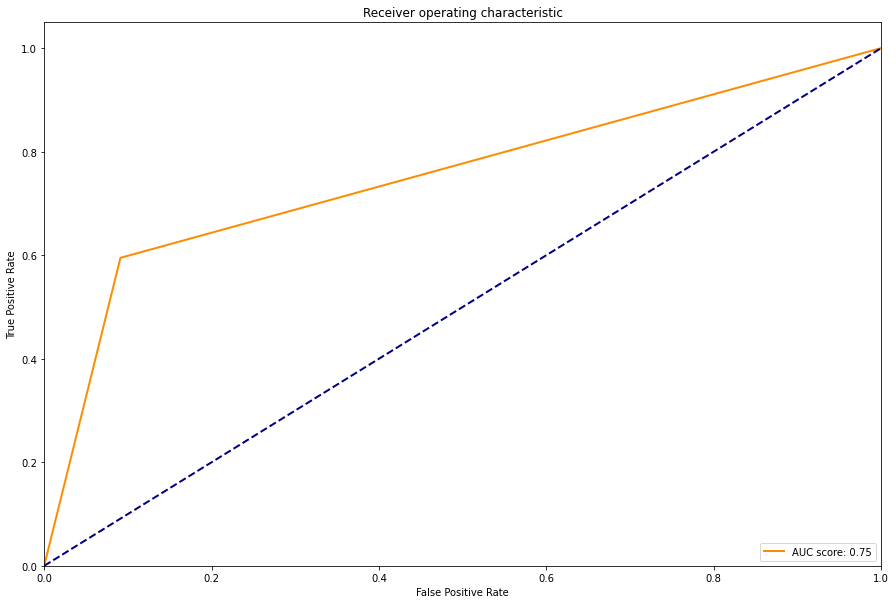

0.7518837339268221

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)

# Busqueda de hiperparametros

In [11]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    y_array=np.array(y)
    for distancia in ['uniform', 'distance']:
        for metrica in ['minkowski','cosine','chebyshev','correlation']:
            for k in [2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70]: 
                kf = StratifiedKFold(n_splits=5)
                metricas_de_la_combinacion = []
                for fold_index, (train_index, test_index) in enumerate(kf.split(X, y_array)):
                    print(k)
                    train_fold_actual = X.iloc[train_index].copy()
                    test_fold_actual = X.iloc[test_index].copy()
                    train_fold_actual, test_fold_actual = normalizar_datos(train_fold_actual, test_fold_actual)
                    knn = KNeighborsClassifier(n_neighbors=k, weights=distancia, metric=metrica)
                    knn.fit(train_fold_actual, y.iloc[train_index])
                    y_pred = knn.predict_proba(test_fold_actual)[:,1]
                    metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                    print(roc_auc_score(y.iloc[test_index], y_pred))
                        
                print(f"Promedio de la combinación: {np.mean(metricas_de_la_combinacion)}")
                metrics.append((k, distancia, metrica, np.mean(metricas_de_la_combinacion)))
                    
    df_metrics = pd.DataFrame(metrics, columns = ['cant_vecinos', 'distancia', 'metrica', 'rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]
    return mejor_combinacion

In [12]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

2
0.7965392124103535
2
0.789745016635295
2
0.8011588851256523
2
0.8014593807790106
2
0.7997403831071264
Promedio de la combinación: 0.7977285756114875
3
0.8269960072892882
3
0.81836904968298
3
0.8341301402235652
3
0.8325367844346477
3
0.8292712564394691
Promedio de la combinación: 0.82826064761399
4
0.8462979120128872
4
0.835422613371805
4
0.8485637352635229
4
0.8530700091019416
4
0.8494285874240473
Promedio de la combinación: 0.8465565714348408
5
0.8571315495822169
5
0.8455775476149198
5
0.8578925160780331
5
0.8665070472970742
5
0.8626422049402285
Promedio de la combinación: 0.8579501731024944
10
0.8821814520204365
10
0.8762797670645929
10
0.8828513922255795
10
0.8893642598119346
10
0.8884540656371772
Promedio de la combinación: 0.8838261873519441
15
0.88598801155478
15
0.8845217584910179
15
0.8906854990175681
15
0.8947472534219999
15
0.8924833131067961
Promedio de la combinación: 0.8896851671184324
20
0.8906152347979976
20
0.8879565934383462
20
0.8934755485932238
20
0.896531458457169

In [13]:
parametros_knn = mejor_combinacion.loc[:].values[0]
knn = KNeighborsClassifier(n_neighbors=parametros_knn[0], weights=parametros_knn[1], metric=parametros_knn[2])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.87      0.93      0.90      6159
   Tiene Alto Valor Adquisitivo       0.72      0.58      0.65      1982

                       accuracy                           0.84      8141
                      macro avg       0.80      0.76      0.77      8141
                   weighted avg       0.84      0.84      0.84      8141



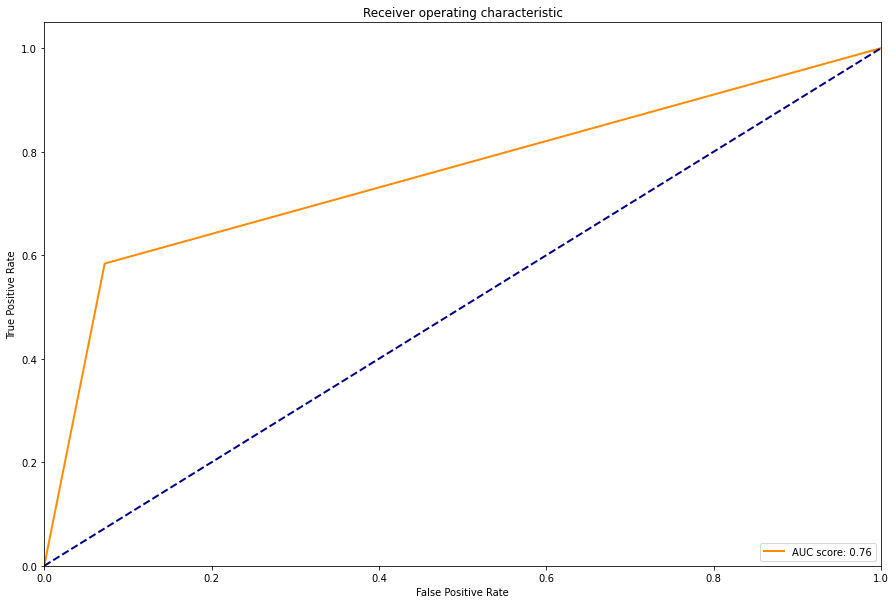

0.755750897548631

In [14]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)